In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from tpot import TPOTClassifier
import warnings

In [3]:
df_air = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Air Data.csv')

In [6]:
# df_air['Température 1 (◦C)'].value_counts()

In [401]:
df_air

,Date,Température 1 (◦C),Température 2 (◦C),Température 3 (◦C),Humidité 1 (%),Humidité 2 (%),Humidité 3 (%),CO2 (ppm),Unnamed: 8
0,8/8/21 0:00,$24.10,23.3,24.7,80.0,80.0,79.0,-,NaN
1,8/8/21 0:30,24,23.2,24.6,80.0,80.0,79.0,-,NaN
2,8/8/21 1:00,23.9,23.1,24.5,80.0,80.0,78.0,-,NaN
3,8/8/21 1:30,23.9,23.1,24.5,80.0,80.0,78.0,-,NaN
4,8/8/21 2:00,23.8,23.0,24.5,79.0,79.0,78.0,-,NaN
...,...,...,...,...,...,...,...,...,...
15713,30/9/22 21:30,24.65,23.9,24.6,63.0,67.0,66.0,"1,349.90",NaN
15714,30/9/22 22:00,24.4,23.7,24.2,64.0,69.0,70.0,"1,274.60",NaN
15715,30/9/22 22:30,23.38,23.8,24.6,64.0,66.0,66.0,"1,280.40",NaN
15716,30/9/22 23:00,22.81,23.4,24.3,66.0,66.0,67.0,"1,558.50",NaN


In [5]:
df_g1 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Groupe 1 (Twr 1,2,3,4).csv', low_memory=False)
df_g1.columns = df_g1.iloc[0] 
df_g1 = df_g1[1:]

In [6]:
print(df_g1.columns)
print(f'\n length: {len(df_g1.columns)}')
print(len(df_g1))

Index([                  'Date',       'nutriments (S21)',
                     'Avg. E.C',       'Water Temp (S22)',
               'Avg. TEMP (°F)',               'pH (S23)',
                      'Avg. pH', 'twr  level (in " S31) ',
         'Avg. Tower Level (")',           'Dissolved O2',
                'Avg. DO (ppm)',        'Flowswitch (D1)',
              'tower valv (R1)',        'tower pump (R2)',
              'Lvl ntrlck (R3)',        'PRGHGHCOND (R4)',
                   'Alarm (R5)',            'Manual (R6)',
                  'Manual (R7)',            'Manual (R8)',
               'PSC pump (A41)',           'nutA&B (A42)',
               'pH- Pump (A43)',         'pH+ Pump (A44)',
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan],
      dtype='object', name=0)

 length: 32
29608


In [18]:
df_g2 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Groupe 2 (Twr 5,6,7,8).csv', low_memory=False)
df_g2.columns = df_g2.iloc[0] 
df_g2 = df_g2[1:]

In [19]:
print(df_g2.columns)
print(f'\n length: {len(df_g2.columns)}')
print(len(df_g2))

Index([                  'Date',              'PSC (S11)',
                     'Avg. PSC',       'nutriments (S21)',
                     'Avg. E.C',       'Water Temp (S24)',
               'Avg. TEMP (°F)',               'pH (S23)',
                       'Avg pH', 'twr  level (in " S31) ',
         'Avg. Tower Level (")',        'Flowswitch (D1)',
              'tower valv (R1)',        'tower pump (R2)',
              'Lvl ntrlck (R3)',        'PRGHGHCOND (R4)',
                   'Alarm (R5)',            'Manual (R6)',
                  'Manual (R7)',            'Manual (R8)',
               'PSC pump (A41)',           'nutA&B (A42)',
               'pH- Pump (A43)',         'pH+ Pump (A44)',
                   'Off / On 1',             'Off / On 2',
                   'Off / On 3',               'Comments',
                            nan,                      nan,
                            nan],
      dtype='object', name=0)

 length: 31
55066


In [20]:
df_g2['Lvl ntrlck (R3)'].value_counts()

Off    48891
On      2405
Name: Lvl ntrlck (R3), dtype: int64

In [10]:
df_g56 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Group 5 & 6 (Twr 17 to 24).csv', low_memory=False)
df_g56.columns = df_g56.iloc[0] 
df_g56 = df_g56[1:]

In [11]:
print(df_g56.columns)
print(f'\n length: {len(df_g56.columns)}')
print(len(df_g56))

Index([            'Date',   'G6 nutAB (S11)',    'G6 temp (S12)',
            'G6 Ph (S13)',    'G6 Temp (S14)',   'G5 nutAB (S21)',
          'G5 temp (S22)',      'G5 Ph (S23)',    'G5 Temp (S24)',
            'G6 dO (S31)',  'G6 TnkLVL (S32)',  'G5 TnkLVL (S33)',
            'G5 dO (S34)',     'G6 Flow (D1)',     'G5 Flow (D2)',
       'G6 tnkFEED (R11)',          '- (R12)', 'G5 TnkFEED (R13)',
                '- (R14)',          '- (R21)',          '- (R22)',
                '- (R23)',          '- (R24)', 'G6 Tnk PMP (R31)',
                '- (R32)', 'G5 Tnk PMP (R33)',          '- (R34)',
       'G6 nAB pmp (A41)', 'G6 Ph pump (A42)', 'G5 nAB pmp (A43)',
       'G5 Ph pump (A44)',                nan],
      dtype='object', name=0)

 length: 32
131554


In [13]:
!pwd

/home/williamjwall/code/gidahusa/Aquaverti-Data-Analysis/notebooks


In [381]:
plant_health_df = pd.read_csv('../../raw_data/Copy of Copy of Trackers (2.0) - Plant health.csv')

In [17]:
# plant_health_df['Tower:'].value_counts().sort_values(ascending=False)

In [542]:
grouping_towers_dicta = {"group 1": ["Tower 1", "Tower 2","Tower 3", "Tower 4"],
                         "group 2": ["Tower 5", "Tower 6","Tower 7", "Tower 8"],
                         "group 5/6": ["Tower 14", "Tower 15","Tower 16", "Tower 17", "Tower 18", "Tower 19","Tower 20", "Tower 21", "Tower 22", "Tower 23","Tower 24"],
                         "group other": ["Tower 9", "Tower 10","Tower 11", "Tower 12", "Tower 13"]}

In [1008]:
X_g1.describe().T

,count,mean,std,min,25%,50%,75%,max
nutriments (S21),689.0,1.763822,0.022512,1.670357,1.765005,1.768588,1.774002,1.782315
Water Temp (S22),689.0,67.935208,0.289223,67.549057,67.705797,67.882065,68.092254,68.608343
pH (S23),689.0,5.758834,0.111860,5.431346,5.787310,5.797845,5.809989,5.822409
"twr level (in "" S31)",689.0,14.139819,0.106425,13.869802,14.139552,14.165122,14.188717,14.339970
Dissolved O2,689.0,3.450353,0.805312,1.224324,3.093694,3.439135,3.912871,5.333069


In [265]:
plant_health_df = plant_health_df[['Harvest date:', 'Crop age:','Harvested crop:','Average float weight:', 'Tower:', 'Level:', 'Plant health issues:', 'Black heart level:']]

In [49]:
len(plant_health_df["Plant health issues:"].value_counts())

163

In [29]:
plant_health_df["Average float weight:"].isnull().sum()

164

In [73]:
plant_health_df["Harvest date:"] = pd.to_datetime(plant_health_df["Harvest date:"])
plant_health_df["Crop age:"] = pd.to_timedelta(plant_health_df["Crop age:"], unit='D')

In [75]:
plant_health_df['Transplant date:'] = plant_health_df["Harvest date:"] - pd.to_timedelta(plant_health_df["Crop age:"], unit='D')

In [98]:
plant_health_df['Tower:'].value_counts().sort_values(ascending=False)

group 1        1169
group 2        1106
group 5/6       538
group other      78
Name: Tower:, dtype: int64

In [89]:
plant_health_df_g2 = plant_health_df.groupby("Tower:").get_group('group 2')

In [95]:
plant_health_df_g2['Black heart level:'].isnull().sum()

536

In [232]:
def average_of_cycle(dfy, dfX):
    lista = []
    lista2 = []
    for a, b in dfy[['Harvest date:', 'Transplant date:']].itertuples(index=False):
        lista.append(dfX[(dfX['Date'] < a) & (dfX['Date'] > b)])
    for i in lista:
        if len(i) != 0:
            i = i.dropna(axis=1)
            i = i.set_index(i['Date'])
            i_date = pd.to_datetime(i['Date'].iloc[-1].strftime("%Y-%m-%d"))
            i = i[i.columns[1:]].apply(lambda x: pd.to_numeric(x, errors='coerce'))
            df_mean = pd.DataFrame(i.select_dtypes(include=['float64','int64']).dropna(how='all', axis=1).mean()[:-4]).T
            df_mean.at[0, "index"] = i_date
            lista2.append(df_mean)
        else:
            pass
    return lista2

In [233]:
avg_lista = average_of_cycle(plant_health_df_g2, df_g2)

In [250]:
avg_lista[0]

,nutriments (S21),Water Temp (S24),pH (S23),"twr level (in "" S31)",index
0,1.794549,69.449581,5.838281,14.045015,2021-09-22


In [247]:
avg_lista_cleaned = []
count = -1
for i in avg_lista:
    count += 1
    if len(avg_lista[count].iloc[0]) == 6:
        avg_lista_cleaned.append(i)
    else:
        pass

In [249]:
avg_lista_cleaned[0]

,nutriments (S21),Water Temp (S24),pH (S23),"twr level (in "" S31)",PSC pump (A41),index
0,1.798798,71.531778,5.786415,14.173446,15.621277,2022-03-17


In [287]:
concat1_grp_1 = pd.concat(avg_lista_cleaned, join='outer')

In [288]:
concat1_grp_1.reset_index(inplace=True)
concat1_grp_1.rename(columns = {'index':'Harvest date:'}, inplace=True)

In [289]:
concat1_grp_1.head(1)

,level_0,nutriments (S21),Water Temp (S24),pH (S23),"twr level (in "" S31)",PSC pump (A41),Harvest date:
0,0,1.798798,71.531778,5.786415,14.173446,15.621277,2022-03-17


In [268]:
plant_health_df['Harvested crop:'].value_counts()

Lettuce (Muir)           1009
Kale (Starbor)            855
Romaine (Monte Carlo)     829
Lettuce (Butterhead)      135
Arugula (Standard)         51
Lettuce (Biondi)            5
Romaine (Dragoon)           2
Kale (Darkibor)             1
Kale (Winterbor)            1
Spinach (Perpetual)         1
Lettuce (Tennis ball)       1
Kale (Black Magic)          1
Name: Harvested crop:, dtype: int64

In [278]:
plant_health_df_g2_lettuce = plant_health_df_g2.groupby("Harvested crop:").get_group("Lettuce (Muir)")[['Harvest date:', 'Crop age:','Harvested crop:','Average float weight:', 'Tower:', 'Level:', 'Plant health issues:', 'Black heart level:']]

In [281]:
dfXy_g1 = pd.merge(concat1_grp_1, plant_health_df_g2_lettuce, how="inner", on=["Harvest date:"])

In [302]:
dfXy_g1['Plant health issues:'].unique()

array(['**Healthy crop**', 'Black hearts', nan], dtype=object)

In [307]:
dfXy_g1['Plant health issues:'].replace("**Healthy crop**", "healthy", inplace=True)

In [308]:
dfXy_g1['Plant health issues:'].replace("Black hearts", "bad", inplace=True)

In [336]:
dfXy_g1.dropna(inplace=True)

In [392]:
g1_corr = dfXy_g1[['nutriments (S21)', 'Water Temp (S24)', 'pH (S23)',
       'twr  level (in " S31) ', 'PSC pump (A41)', 'Plant health issues:']]

In [402]:
# abs_corrsort = abs(g1_corr.corr()).sort_values(ascending=False)[1:]

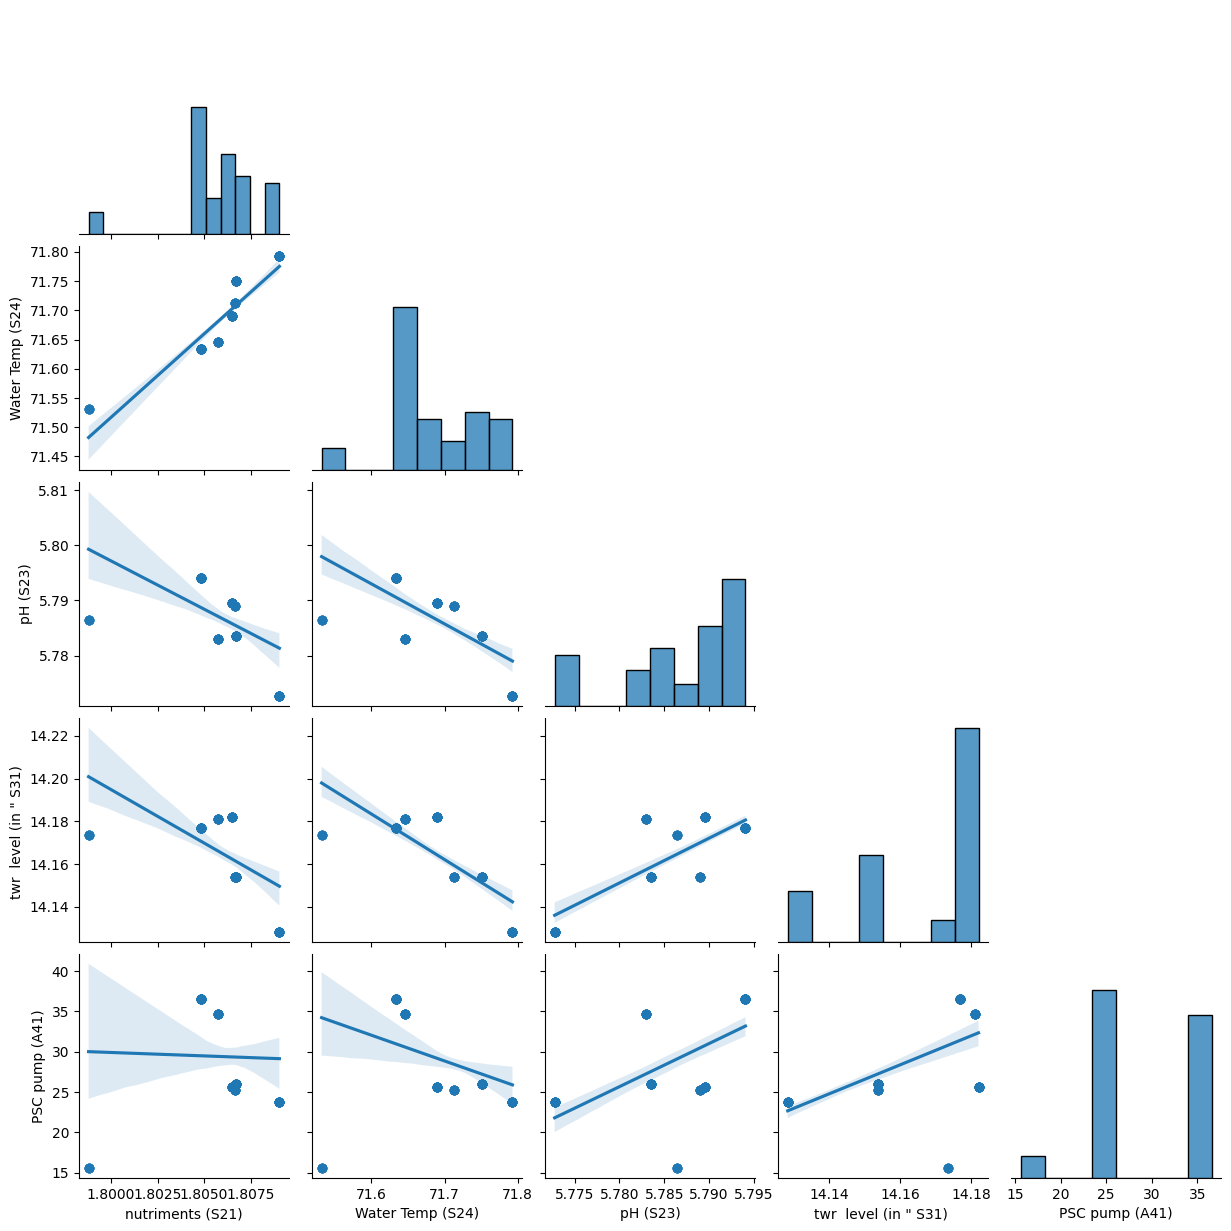

In [391]:
sns.pairplot(data=dfXy_g1[['nutriments (S21)', 'Water Temp (S24)', 'pH (S23)',
       'twr  level (in " S31) ', 'PSC pump (A41)', 'Plant health issues:']], kind='reg', diag_kind='hist', corner=True);

In [403]:
X_g1 = dfXy_g1[['nutriments (S21)', 'Water Temp (S24)', 'pH (S23)',
       'twr  level (in " S31) ', 'PSC pump (A41)']]

In [404]:
y_g1 = dfXy_g1[['Plant health issues:']]

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X_g1, y_g1, test_size = 0.2)

In [406]:
num_transformer = make_pipeline( MinMaxScaler())
num_col = make_column_selector(dtype_include=['float64'])

cat_transformer = OneHotEncoder()
cat_col = make_column_selector(dtype_include=['object','bool'])

preproc = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='passthrough')

In [407]:
pipe_baseline = make_pipeline(preproc, LogisticRegression())

In [408]:
pipe_baseline.fit(X_train, y_train)
y_pred = pipe_baseline.predict(X_test)

/home/williamjwall/.pyenv/versions/3.10.6/envs/aquaverti/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [409]:
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
# print("Precision: {:.2f}".format(precision))
# print("Recall: {:.2f}".format(recall))
# print("F1 score: {:.2f}".format(f1))

Accuracy: 0.76


In [413]:
pipe_baseline.coefs_

AttributeError: 'Pipeline' object has no attribute 'coefs_'